# Regressão 01 - tarefa 03 - transformações em X e Y

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy 


In [6]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [10]:
formula = 'tip ~ sex + smoker + time + net_bill'
y, X = patsy.dmatrices(formula, data=tips)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        18:56:01   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

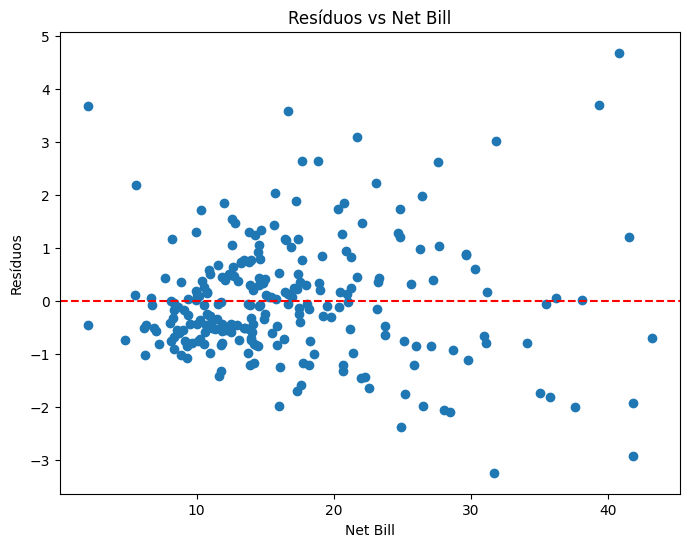

In [11]:
# Calculando os resíduos
residuals = model.resid

# Criando gráfico de dispersão dos resíduos em função de net_bill
plt.figure(figsize=(8, 6))
plt.scatter(tips['net_bill'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.show()

In [12]:
# Modelo com transformação logarítmica de net_bill
formula_log = 'tip ~ sex + smoker + day + time + np.log(net_bill)'
y_log, X_log = patsy.dmatrices(formula_log, data=tips)

# Ajuste do modelo
model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     14.37
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.56e-15
Time:                        18:57:11   Log-Likelihood:                -381.64
No. Observations:                 244   AIC:                             779.3
Df Residuals:                     236   BIC:                             807.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2957      0.487  

In [13]:
# Modelo com net_bill elevado ao quadrado
formula_poly = 'tip ~ sex + smoker + day + time + net_bill + np.power(net_bill, 2)'
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips)

# Ajuste do modelo
model_poly = sm.OLS(y_poly, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     15.07
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           8.55e-18
Time:                        18:57:21   Log-Likelihood:                -374.42
No. Observations:                 244   AIC:                             766.8
Df Residuals:                     235   BIC:                             798.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.98

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [14]:
formula = 'np.log(tip) ~ sex + smoker + time + net_bill'
y, X = patsy.dmatrices(formula, data=tips)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.21e-18
Time:                        18:58:38   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [15]:
# Remover variáveis não significantes da fórmula
formula = 'np.log(tip) ~ net_bill + smoker'

# Ajustar novamente o modelo sem variáveis não significantes
y, X = patsy.dmatrices(formula, data=tips)
model = sm.OLS(y, X).fit()

# Exibir o novo resumo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.31e-20
Time:                        18:58:55   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254   

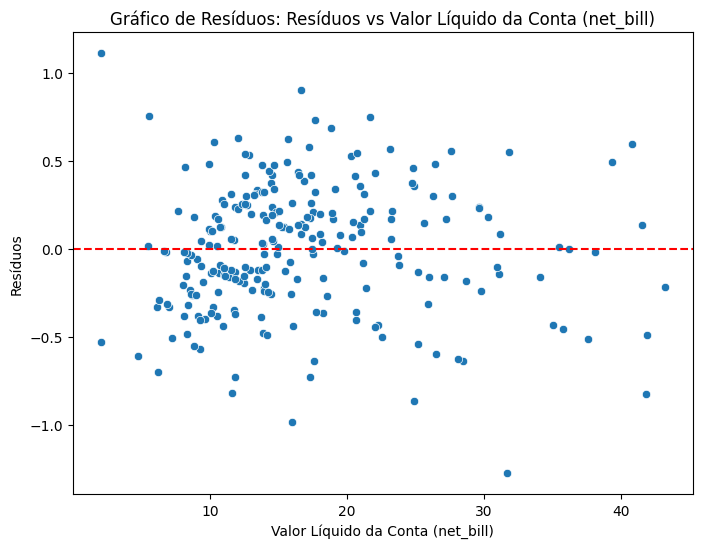

In [16]:
# Prever os valores ajustados
predicted_log_tip = model.fittedvalues

# Calcular os resíduos
residuals = model.resid

# Gráfico de resíduos vs net_bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos: Resíduos vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.show()

In [17]:
# Testar o log de net_bill
formula_log = 'np.log(tip) ~ np.log(net_bill) + smoker'

# Ajustar o modelo
y, X = patsy.dmatrices(formula_log, data=tips)
model_log = sm.OLS(y, X).fit()

# Exibir o resumo
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           7.20e-21
Time:                        18:59:31   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138  

In [18]:
# Testar um polinômio de segundo grau em net_bill
formula_poly = 'np.log(tip) ~ np.power(net_bill, 2) + net_bill + smoker'

# Ajustar o modelo
y, X = patsy.dmatrices(formula_poly, data=tips)
model_poly = sm.OLS(y, X).fit()

# Exibir o resumo
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     40.92
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.15e-21
Time:                        18:59:39   Log-Likelihood:                -92.864
No. Observations:                 244   AIC:                             193.7
Df Residuals:                     240   BIC:                             207.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.17

In [19]:
# Prever o valor de tip em vez de log(tip)
predicted_tip = np.exp(model_log.fittedvalues)  # Se o modelo final usa log(net_bill)

# Calcular o R^2 na escala de tip
ss_residual = np.sum((tips['tip'] - predicted_tip) ** 2)
ss_total = np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2)
r_squared_tip = 1 - (ss_residual / ss_total)

print(f"R² do modelo na escala de 'tip': {r_squared_tip:.4f}")

R² do modelo na escala de 'tip': 0.3050


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [22]:
df = pd.read_csv('previsao_de_renda.csv',na_values=('NA','',' ','nan','NAN','na'))
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [24]:
df.shape

(15000, 16)

In [23]:
df.isnull().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [62]:
mean_tempo_emprego = df['tempo_emprego'].mean()

df['tempo_emprego'].fillna(mean_tempo_emprego, inplace=True)
df = pd.get_dummies(df,drop_first=True)
df=df.astype(int)


In [64]:
# Definir variável resposta e variável explicativa
X = df['tempo_emprego']
y = df['renda']

In [65]:
# Adicionar constante ao modelo
X = sm.add_constant(X)

In [66]:
# Ajustar o modelo
modelo_simples = sm.OLS(y, X).fit()


In [67]:
# Resumo do modelo
print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2514.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:08:15   Log-Likelihood:            -1.4672e+05
No. Observations:               15000   AIC:                         2.934e+05
Df Residuals:                   14998   BIC:                         2.935e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2580.7235     53.704     48.054

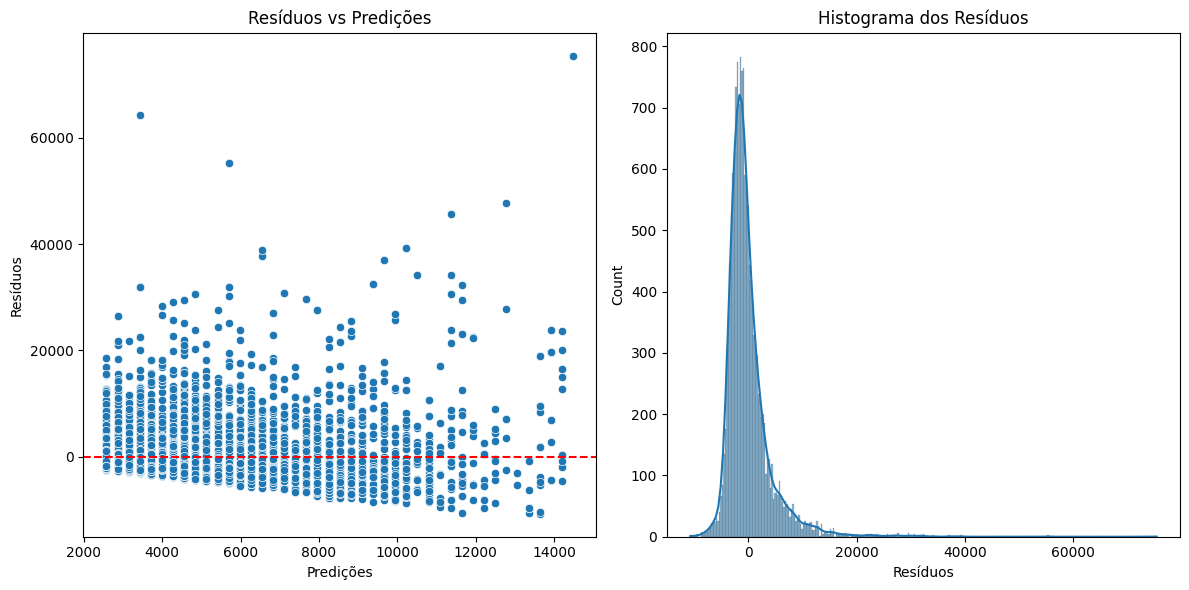

In [68]:
# Predições do modelo
predicoes = modelo_simples.predict(X)

# Cálculo dos resíduos
residuos = y - predicoes

# Plot de Resíduos
plt.figure(figsize=(12, 6))

# Resíduos vs Predições
plt.subplot(1, 2, 1)
sns.scatterplot(x=predicoes, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Predições')
plt.xlabel('Predições')
plt.ylabel('Resíduos')

# Histograma dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()

In [73]:
columns_list = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'log_renda', 'sexo_M', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor público', 'educacao_Pós graduação', 'educacao_Secundário', 'educacao_Superior completo', 'educacao_Superior incompleto', 'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Casa', 'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental']
X_mult = df[columns_list]
y_mult = df['renda']

# Adicionar constante ao modelo
X_mult = sm.add_constant(X_mult)

# Ajustar o modelo
modelo_multiplo = sm.OLS(y_mult, X_mult).fit()

# Resumo do modelo
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1005.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:19:10   Log-Likelihood:            -1.4031e+05
No. Observations:               15000   AIC:                         2.807e+05
Df Residuals:                   14973   BIC:                         2.809e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [77]:
# Selecionar variáveis significativas (p-valor < 0.05)
significativas = modelo_multiplo.pvalues[modelo_multiplo.pvalues > 0.05].index.tolist()


X_significativas = X_mult[significativas]
X_significativas = sm.add_constant(X_significativas)
# Ajustar o modelo com variáveis significativas
modelo_significativo = sm.OLS(y_mult, X_significativas).fit()

# Resumo do modelo
print(modelo_significativo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     14.38
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.31e-39
Time:                        23:28:12   Log-Likelihood:            -1.4777e+05
No. Observations:               15000   AIC:                         2.956e+05
Df Residuals:                   14983   BIC:                         2.957e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

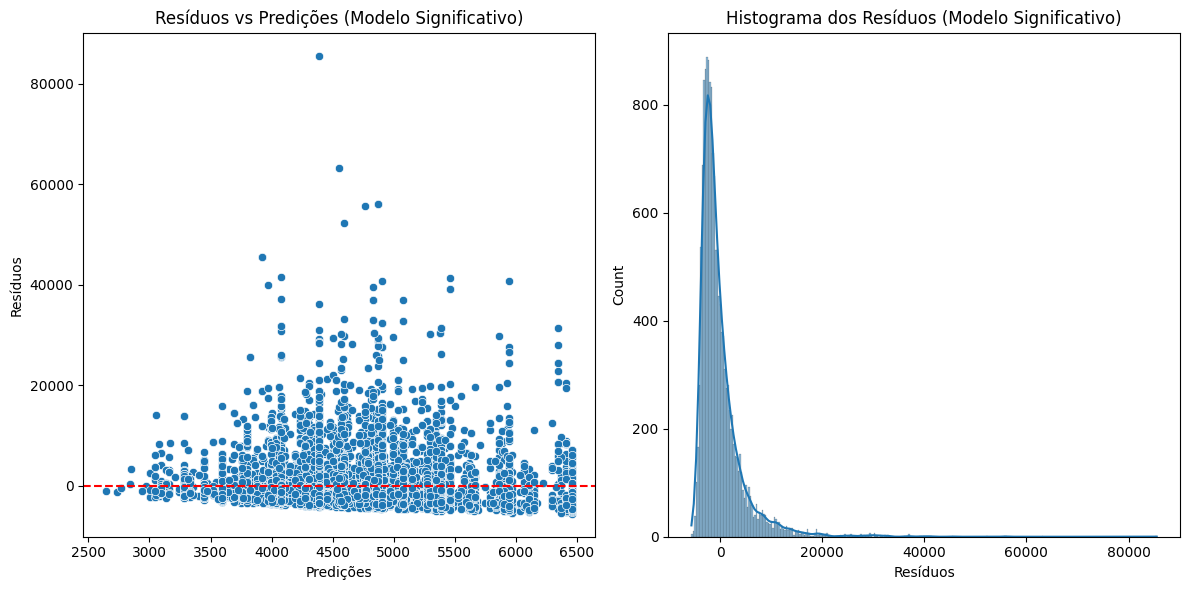

In [78]:
# Predições do modelo significativo
predicoes_significativas = modelo_significativo.predict(X_significativas)

# Cálculo dos resíduos
residuos_significativos = y_mult - predicoes_significativas

# Plot de Resíduos
plt.figure(figsize=(12, 6))

# Resíduos vs Predições
plt.subplot(1, 2, 1)
sns.scatterplot(x=predicoes_significativas, y=residuos_significativos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Predições (Modelo Significativo)')
plt.xlabel('Predições')
plt.ylabel('Resíduos')

# Histograma dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos_significativos, kde=True)
plt.title('Histograma dos Resíduos (Modelo Significativo)')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()